## Module 1

---




#**Sentiment analysis for social media using BERT Model and XGBoost**

    Mind map for this project
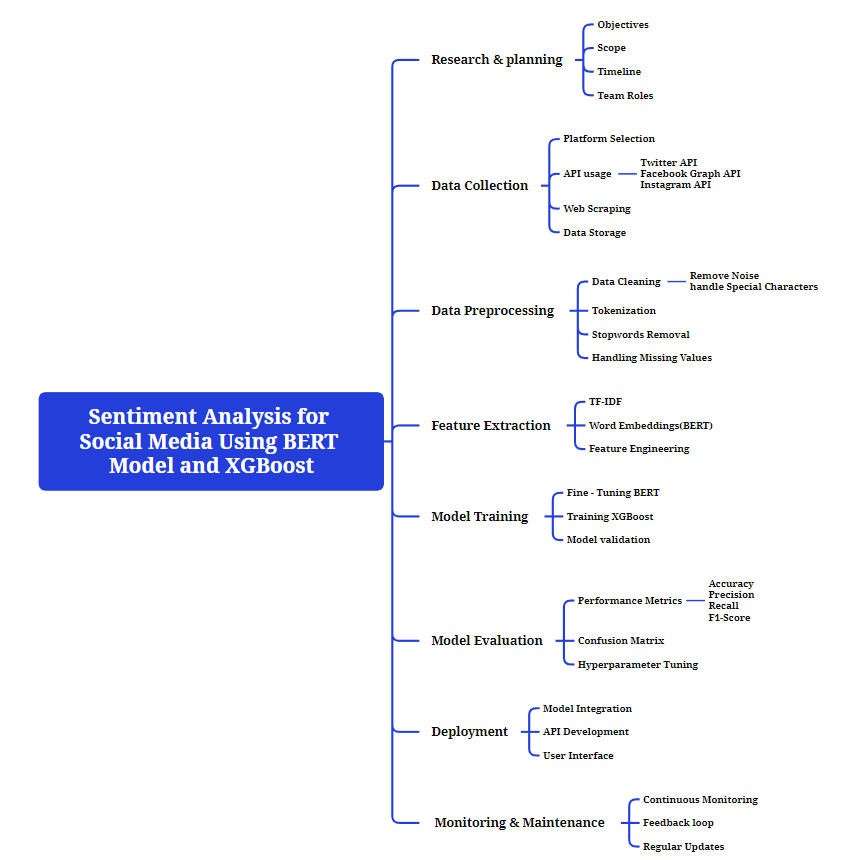

##Mount of Google Drive
###For import data files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data collection process

In [ ]:
import pandas as pd

pre_dataset = pd.read_csv("/content/drive/MyDrive/dataset.csv")
pre_dataset

In [ ]:
#EAA5MvOYZCEFEBOxZCCRfWQ9ClgG3ZCGZBgZBqEHqYCpoYSttPizKDkClPHBbIETZAJanGeY0lv1Fies7oWxtK7BaVrWRzwVRdCvrFYBrpXscW115JtSd9zHtc5JoB0dIZBErqstPnvDv3LOEV2Xhg5U0VLkfYHBkfB3QaZCywlPCbdSp8gZAzk4KBnbimjhdZAwMAlrPaa801SCgGTy874UqZCp2iMEyhfGKQQVfpMbZCMHgx1QnZC3j9zDKlceBcCAZAUAalqWXk3sHsZD

In [ ]:
#EAA5MvOYZCEFEBOyFEpQcMOXZCUAjD1QTu6IcsHw6AVhVJ81zcdI62GZCw8oHEi203Pk2E3tpT42bzdByBuXSV0rI7QJVSz5xbkxFk077ZALp7hh7gPiNHHQOmLO9win0YcGcAktcZB736X3tY6HPL7HYP2ofYtWEAoAhZB6joiLMag6xilzRGKI54bAZAZBuRziTZC68VCn4upJ2QxW4pz3enQX2NuxAZD

In [ ]:
!pip install emoji

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
import emoji
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Ensure input is a string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (@user)
    text = re.sub(r'@\S+', '', text)

    # Remove hashtags (#hashtag)
    text = re.sub(r'#\S+', '', text)

    # Remove special characters and numbers (except '!')
    text = re.sub(r'[^a-zA-Z!\s]', '', text)

    # Replace multiple '!' with a single '!'
    text = re.sub(r'!+', '!', text)

    # Remove single characters (but keep meaningful ones like 'I')
    text = re.sub(r'\s+[b-df-hj-np-tv-zB-DF-HJ-NP-TV-Z]\s+', ' ', text)  # Keeps 'I'

    # Remove single characters at the start of words
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    # Remove prefixed 'b' (byte-string artifacts)
    text = re.sub(r'^b\s+', '', text)

    # Convert FULLY CAPITALIZED words to sentence case
    words = text.split()
    processed_words = [word.capitalize() if word.isupper() else word for word in words]
    text = ' '.join(processed_words)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatize words
    text = emoji.demojize(text)  # Convert emojis to text

    return text
pre_dataset['text'] = pre_dataset['text'].apply(clean_text)

In [ ]:
pre_dataset.head(10)

In [ ]:
print(pre_dataset.text)

In [ ]:
all_text = ''.join(pre_dataset['text'])  # Merge all text into one string
chars = sorted(set(all_text))  # Extract unique characters
vocab_size = len(chars)

print(''.join(chars))  # Print all unique characters
print(vocab_size)  # Print number of unique characters


In [ ]:
# @title airline_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
pre_dataset.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Adding New column on dataset name called (Sentiment)
##In this column have Various sentiment like (sad, happy, sarcasm, irony)

In [ ]:
#!pip install transformers

In [ ]:
#!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
import pandas as pd
import re

In [ ]:


# Create an instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


def analyze_sentiwordnet(text):
  """Analyze sentiment using SentiWordNet."""

  # Tokenize the text (you might need to improve this part)
  tokens = nltk.word_tokenize(text)

  # Calculate sentiment scores for each token
  pos_score = 0
  neg_score = 0

  for token in tokens:
    synsets = list(swn.senti_synsets(token))
    if synsets:
      # Get the first synset (most common meaning)
      synset = synsets[0]
      pos_score += synset.pos_score()
      neg_score += synset.neg_score()

  # Determine overall sentiment based on scores
  if pos_score > neg_score:
    return "happy"
  elif neg_score > pos_score:
    return "sad"
  else:
    return "unknown"  # Neutral or undefined sentiment

#Hybrid Approach (Combine Lexicons for Best Accuracy!)
##Predefined Sentiment Dictionaries
The Hybrid Approach combines multiple sentiment analysis methods to improve accuracy.
It uses:

✅ VADER – Handles social media texts, sarcasm, and irony detection.

✅ SentiWordNet – Provides fine-grained sentiment scoring using a lexical database.

✅ Custom Keyword Matching – Ensures domain-specific sentiment detection (e.g., airline-related words).

Use VADER + SentiWordNet + Custom Keywords together:

###Steps in the Hybrid Approach
Use VADER to detect sentiment from short texts (tweets).
Use SentiWordNet to analyze each word’s positive/negative score.
Check for custom keyword-based sentiment mapping.
Combine the outputs from all three methods to determine the best sentiment label.

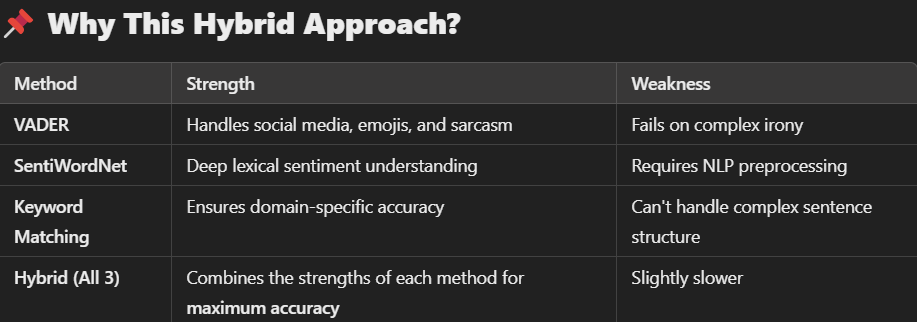


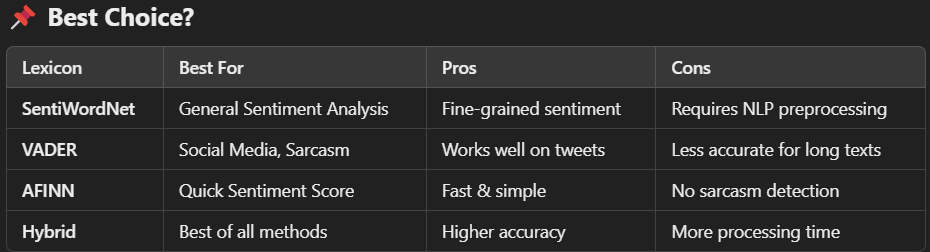

In [ ]:
# Load dataset
df = pre_dataset  # Update with the correct filename

def hybrid_sentiment(text):
    vader_score = analyzer.polarity_scores(text)["compound"]
    sentiword_score = analyze_sentiwordnet(text)

    if vader_score >= 0.5 or sentiword_score == "happy":
        return "happy"
    elif vader_score <= -0.5 or sentiword_score == "sad":
        return "sad"
    else:
        return "sarcasm" if "!" in text or text.isupper() else "irony"

df["sentiment"] = df["text"].apply(hybrid_sentiment)

# Keep only labeled rows (excluding 'unknown')
df = df[df["sentiment"] != "unknown"]
df


In [ ]:
'''# Save the filtered dataset for training
df.to_csv("processed_sentiment_dataset.csv", index=False)
print("Done ")'''

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
# Count each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Print the count for each label
print(sentiment_counts)


In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Define a vibrant color palette
colors = sns.color_palette("viridis", len(df['sentiment'].unique()))

# Plot horizontal bar chart
ax = sns.barplot(
    x=df['sentiment'].value_counts().values,
    y=df['sentiment'].value_counts().index,
    palette=colors
)

# Add value labels on bars
for i, v in enumerate(df['sentiment'].value_counts().values):
    ax.text(v + 50, i, str(v), color='black', fontsize=12, fontweight='bold', va="center")

# Customize chart aesthetics
plt.title(" Sentiment Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top & right borders

# Show the plot
plt.show()


In [ ]:
df.columns

# End of df

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd


In [ ]:
bal_df = pd.read_csv("/content/drive/MyDrive/Copy of processed_sentiment_dataset_fully_balanced_final.csv")
bal_df

In [ ]:
bal_df = pd.read_csv("/content/processed_sentiment_dataset_fully_balanced_final.csv")
bal_df

# **Resampling of the dataset because of imbalanced data labels**

In [ ]:
!pip install emoji

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
import emoji
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Ensure input is a string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (@user)
    text = re.sub(r'@\S+', '', text)

    # Remove hashtags (#hashtag)
    text = re.sub(r'#\S+', '', text)

    # Remove special characters and numbers (except '!')
    text = re.sub(r'[^a-zA-Z!\s]', '', text)

    # Replace multiple '!' with a single '!'
    text = re.sub(r'!+', '!', text)

    # Remove single characters (but keep meaningful ones like 'I')
    text = re.sub(r'\s+[b-df-hj-np-tv-zB-DF-HJ-NP-TV-Z]\s+', ' ', text)  # Keeps 'I'

    # Remove single characters at the start of words
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    # Remove prefixed 'b' (byte-string artifacts)
    text = re.sub(r'^b\s+', '', text)

    # Convert FULLY CAPITALIZED words to sentence case
    words = text.split()
    processed_words = [word.capitalize() if word.isupper() else word for word in words]
    text = ' '.join(processed_words)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatize words
    text = emoji.demojize(text)  # Convert emojis to text

    return text
bal_df['text'] = bal_df['text'].apply(clean_text)

In [ ]:
bal_df_val_counts = bal_df['sentiment'].value_counts()
print(bal_df_val_counts)

In [ ]:
bal_df.shape

In [ ]:
bal_df.count()

In [ ]:
print(bal_df['text'])

In [ ]:
bal_df['text'].duplicated().drop_duplicates()

In [ ]:
bal_df_val_counts = bal_df['text'].value_counts()
print(bal_df_val_counts)

In [ ]:
bal_df.count()

In [ ]:
'''new_data=pd.read_csv('/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv')
new_data.to_csv('sentimentdataset.csv', index=False)'''

In [ ]:
# prompt: bal_df_val_counts = bal_df['sentiment'].value_counts()
# print(bal_df_val_counts)
# plot this and using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bal_df_val_counts is already defined as in your provided code
# bal_df_val_counts = bal_df['sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", len(bal_df_val_counts))

ax = sns.barplot(x=bal_df_val_counts.values,
                 y=bal_df_val_counts.index,
                 palette=colors)

for i, v in enumerate(bal_df_val_counts.values):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=12, fontweight='bold', va='center')


plt.title("Sentiment Distribution (Balanced Dataset)", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [ ]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

In [ ]:
# Select only the required columns
bal_df = bal_df[['text', 'sentiment']]

# Display the first few rows
print(bal_df.head())


In [ ]:
import torch
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Pretrained BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Step 1: Load & Check Dataset Size
print(f"Total Samples Before Split: {len(bal_df)}")  # Should print 32,304

# Step 2: Train-Test Split (BEFORE Tokenization)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    bal_df["text"].tolist(),  # Convert Pandas Series to list
    bal_df["sentiment"].tolist(),  # Convert labels to list
    test_size=0.4,  # 90% Train, 10% Validation
    random_state=100,
    stratify=bal_df["sentiment"]  # Ensure class balance
)

# Step 3: Convert Sentiment Labels to Numerical Values
label_encoder = LabelEncoder()
train_labels = torch.tensor(label_encoder.fit_transform(train_labels), dtype=torch.long)
val_labels = torch.tensor(label_encoder.transform(val_labels), dtype=torch.long)

# Step 4: Tokenization (AFTER Splitting)
train_encodings = tokenizer(
    train_texts, padding="max_length", truncation=True, max_length=128, return_tensors="pt"
)
val_encodings = tokenizer(
    val_texts, padding="max_length", truncation=True, max_length=128, return_tensors="pt"
)

# Print Shapes to Verify
print(f"Train Inputs Shape: {train_encodings['input_ids'].shape}")
print(f"Train Labels Shape: {train_labels.shape}")
print(f"Validation Inputs Shape: {val_encodings['input_ids'].shape}")
print(f"Validation Labels Shape: {val_labels.shape}")


In [ ]:
# Print first 5 tokenized samples
for i in range(5):
    print(f"Sample {i+1}: {train_encodings['input_ids'][i].tolist()}")


In [ ]:
# Decode tokenized IDs back to text
for i, tokens in enumerate(train_encodings['input_ids'][:5]):  # First 5 samples
    original_text = train_texts[i]  # Get the original text from training dataset
    decoded_text = tokenizer.decode(tokens, skip_special_tokens=True)  # Decode tokens
    print(f"Sample {i+1}:")
    print(f"🔹 Original Text: {original_text}")
    print(f"🔹 Decoded Text: {decoded_text}")
    print(f"🔹 Tokenized IDs: {tokens.tolist()}")
    print("-" * 80)  # Separator for readability


In [ ]:
'''import torch
from transformers import BertTokenizer
from sklearn.preprocessing import LabelEncoder

# Load Pretrained BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the 'text' column
encoded_text = tokenizer(
    bal_df["text"].tolist(),  # Convert Pandas Series to list
    padding=True,             # Pad sequences to the same length
    truncation=True,          # Truncate long sequences
    max_length=512,           # Limit token length to BERT's max
    return_tensors="pt"       # Return PyTorch tensors
)

# Convert 'sentiment' labels to numerical values
label_encoder = LabelEncoder()
encoded_labels = torch.tensor(label_encoder.fit_transform(bal_df["sentiment"]), dtype=torch.long)

# Print shape of tokenized text and labels
print(f"Text Tensor Shape: {encoded_text['input_ids'].shape}")  # (num_samples, max_length)
print(f"Labels Shape: {encoded_labels.shape}")  # (num_samples,)
'''

In [ ]:
'''import torch
from transformers import BertTokenizer

# Load Pretrained BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Get first 1000 rows of 'text' column
text_samples = bal_df["text"][:1000].tolist()

# Tokenize and convert to numerical token IDs
encoded_text = tokenizer(
    text_samples,
    padding=True,         # Pad to same length
    truncation=True,      # Truncate if needed
    max_length=512,       # Limit sequence length to BERT's max
    return_tensors="pt"   # Return PyTorch tensor
)

# Extract input IDs
input_ids = encoded_text["input_ids"]

# Print first 5 samples (modify as needed)
for i in range(5):  # Print only first 5 for readability
    print(f"Sample {i+1}: {input_ids[i].tolist()}")

# (Optional) Print all 1000 samples if needed
# for i in range(1000):
#     print(f"Sample {i+1}: {input_ids[i].tolist()}")
'''

In [ ]:
'''from transformers import BertTokenizer

# Load Pretrained BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Get first 1000 rows of 'text' column
text_samples = bal_df["text"][:1000].tolist()

# Tokenize the text (return tokens instead of IDs)
tokenized_text = [tokenizer.tokenize(text) for text in text_samples]

# Print the first few tokenized examples
for i, tokens in enumerate(tokenized_text[:5]):  # Print only first 5 for readability
    print(f"Sample {i+1}: {tokens}")

# (Optional) Print all 1000 tokenized lines if needed
for i, tokens in enumerate(tokenized_text):
     print(f"Sample {i+1}: {tokens}")'''


In [ ]:
print(f"Train Text Samples: {len(train_texts)}")
print(f"Train Labels Samples: {len(train_labels)}")


In [ ]:
'''from sklearn.model_selection import train_test_split
import torch

# Convert input tensors to lists for compatibility
input_ids = encoded_text["input_ids"]
attention_masks = encoded_text["attention_mask"]

# Ensure equal samples
assert len(input_ids) == len(attention_masks) == len(encoded_labels), "Mismatch in input shapes!"

# Split data (90% Train, 10% Validation)
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_masks, encoded_labels,
    test_size=0.1, random_state=42, stratify=encoded_labels
)

# Convert back to PyTorch tensors
train_inputs = torch.tensor(train_inputs)
val_inputs = torch.tensor(val_inputs)

train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

print(f"Train Inputs Shape: {train_inputs.shape}, Train Labels: {train_labels.shape}")
print(f"Validation Inputs Shape: {val_inputs.shape}, Validation Labels: {val_labels.shape}")'''


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert tokenized inputs & labels to PyTorch Dataset
train_dataset = TensorDataset(
    train_encodings["input_ids"],
    train_encodings["attention_mask"],
    train_labels
)

val_dataset = TensorDataset(
    val_encodings["input_ids"],
    val_encodings["attention_mask"],
    val_labels
)

# Define DataLoader
batch_size = 32  # Adjust based on GPU memory

train_dataloader = DataLoader(
    train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size
)

val_dataloader = DataLoader(
    val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size
)



In [ ]:
batch = next(iter(train_dataloader))
input_ids, attention_mask, labels = batch
print(f"Train DataLoader: {len(train_dataloader)} batches")
print(f"Validation DataLoader: {len(val_dataloader)} batches")


In [ ]:
import torch
from transformers import BertModel

# Load Pretrained BERT Model (without classification head)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)
bert_model.eval()  # Set model to evaluation mode


In [ ]:
import numpy as np

# Function to Extract Features from BERT
def extract_features(dataloader, model):
    features = []
    with torch.no_grad():  # No gradient computation
        for batch in dataloader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            # Forward pass through BERT
            outputs = model(input_ids, attention_mask=attention_mask)
            last_hidden_states = outputs.last_hidden_state  # (batch_size, seq_len, hidden_dim)

            # Extract CLS token representation (first token)
            cls_embeddings = last_hidden_states[:, 0, :].cpu().numpy()  # Shape: (batch_size, 768)
            features.append(cls_embeddings)

    return np.vstack(features)  # Stack all batches into a single NumPy array


In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())  # Should print True
print("CUDA Version:", torch.version.cuda)  # Should match your installed CUDA version (12.7)
print("PyTorch Version:", torch.__version__)  # Should print PyTorch version
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


In [ ]:
!pip install torch-xla


In [ ]:
import numpy as np

# Extract BERT Features
train_features = extract_features(train_dataloader, bert_model)
val_features = extract_features(val_dataloader, bert_model)

# Convert Labels to NumPy
train_labels_np = train_labels.numpy()
val_labels_np = val_labels.numpy()

print(f"Train Features Shape: {train_features.shape}")  # (29073, 768)
print(f"Validation Features Shape: {val_features.shape}")  # (3231, 768)


In [ ]:
import numpy as np
unique, counts = np.unique(train_labels_np, return_counts=True)
print(dict(zip(unique, counts)))


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(set(train_labels_np)),
    eval_metric="mlogloss",
    n_estimators=500,  # Increase number of trees
    learning_rate=0.01,  # Reduce learning rate
    max_depth=8,  # Increase model complexity
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    gamma=0.1,  # Add regularization
    random_state=42
)

xgb_model.fit(train_features, train_labels_np)


In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight="balanced", y=train_labels_np)

xgb_model.fit(train_features, train_labels_np, sample_weight=sample_weights)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)  # Reduce to 100 dimensions
train_features_pca = pca.fit_transform(train_features)
val_features_pca = pca.transform(val_features)


In [ ]:
!pip install optuna

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert data to XGBoost DMatrix
dtrain = xgb.DMatrix(train_features, label=train_labels_np)
dval = xgb.DMatrix(val_features, label=val_labels_np)

# XGBoost parameters
params = {
    "objective": "multi:softmax",
    "num_class": len(set(train_labels_np)),
    "eval_metric": "mlogloss",
    "learning_rate": 0.1,  # Try increasing it (default = 0.3)
    "max_depth": 6,  # Reduce depth (default = 6-10)
    "subsample": 0.9,  # Use 80-90% of data per tree
    "colsample_bytree": 0.8,  # Use 80% features per tree
    "gamma": 0.1,  # Add regularization
}


# Train with early stopping
num_rounds = 1000  # Max number of boosting rounds
evals = [(dtrain, "train"), (dval, "val")]

model = xgb.train(params, dtrain, num_rounds, evals, early_stopping_rounds=10, verbose_eval=True)

# Predict on validation set
val_preds = model.predict(dval)
accuracy = accuracy_score(val_labels_np, val_preds)

print(f"Validation Accuracy: {accuracy:.4f}")


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
train_features, train_labels_np = smote.fit_resample(train_features, train_labels_np)


In [ ]:
params["objective"] = "multi:softprob"  # Outputs class probabilities instead of labels


In [ ]:
params["max_depth"] = 4  # Reduce tree depth to avoid overfitting


In [ ]:
params["learning_rate"] = 0.2  # Increase learning rate


In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,  # Increase rounds
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=10,  # Stop if no improvement in 15 rounds
    verbose_eval=True
)


In [ ]:
from collections import Counter

class_counts = Counter(train_labels_np)
max_count = max(class_counts.values())
weights = {cls: max_count / count for cls, count in class_counts.items()}
sample_weights = [weights[label] for label in train_labels_np]

dtrain = xgb.DMatrix(train_features, label=train_labels_np, weight=sample_weights)


In [ ]:
# Make predictions
val_preds = xgb_model.predict(val_features)

# Compute accuracy
accuracy = accuracy_score(val_labels_np, val_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(val_labels_np, val_preds))
